# Terminalogy
1. Data Preprocessing & Dataset Partitioning
2. Convolution Layers & Maxpool Layers
3. Non Linearity with Activation Functions
4. Model Compilation: Metrics
5. Model Evaluation
6. Overfitting & Underfitting. [ https://www.tensorflow.org/tutorials/keras/overfit_and_underfit ]
7. Dropout: A Simple Way to Prevent Neural Networks from Overfitting (original paper: [ http://jmlr.org/papers/v15/srivastava14a.html) ]

# Example 3: Introduction to Convolution Neural Networks


## Download & Extract the Dataset

In [22]:
# !mkdir ./tmp

Download Dataset

In [23]:
# !wget --no-check-certificate \
#   'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip' \
#    -O ./tmp/cats_and_dogs_filtered.zip


## Use Zipfile to extract the files

In [24]:
import zipfile
import os

In [25]:
def extract_file(src, dest):
  # opening the zip file in READ mode
  with zipfile.ZipFile(src, 'r') as zip:
      # extracting all the files
      print(f'Extracting all the files from {src}...')
      zip.extractall(dest)
      print('Done!')

In [26]:
extract_file(src='./tmp/cats_and_dogs_filtered.zip', dest='./data')

Extracting all the files from ./tmp/cats_and_dogs_filtered.zip...
Done!


In [27]:
def get_image_counts(parent_folder, dataset_name):
  horse_dir = os.path.join(parent_folder, 'cats')
  human_dir = os.path.join(parent_folder, 'dogs')

  print(f'total {dataset_name} cats images: {len(os.listdir(horse_dir))}')
  print(f'total {dataset_name} dogs images: {len(os.listdir(human_dir))}')

In [28]:
get_image_counts(parent_folder='./data/cats_and_dogs_filtered/train', dataset_name='train')

total train cats images: 1000
total train dogs images: 1000


In [29]:
get_image_counts(parent_folder='./data/cats_and_dogs_filtered/validation', dataset_name='test')

total test cats images: 500
total test dogs images: 500


### Visualize Data

In [30]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

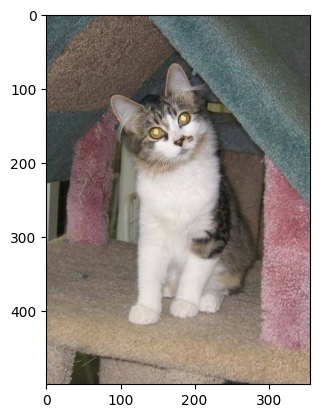

img.shape: (499, 356, 3)


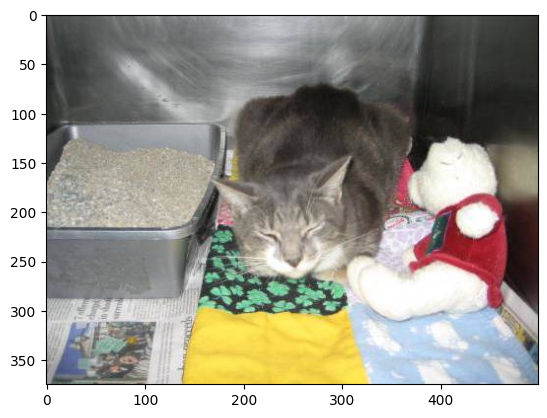

img.shape: (375, 499, 3)


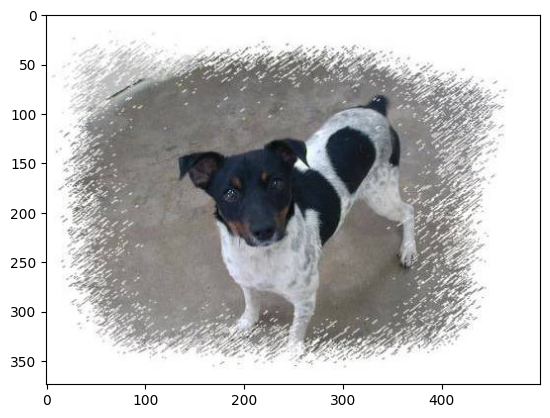

img.shape: (374, 500, 3)


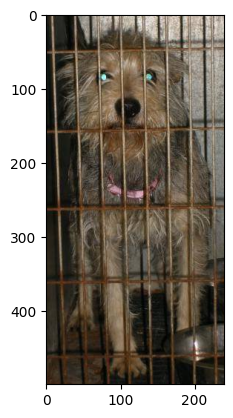

img.shape: (499, 240, 3)


In [31]:
for label in ['cats', 'dogs']:
  im_folder = f'./data/cats_and_dogs_filtered/train/{label}'
  im_count = 2
  for im_name in  os.listdir(im_folder)[:im_count]:
      im_path = os.path.join(im_folder, im_name)
      img = Image.open(im_path).convert('RGB')
      img = np.asarray(img)
      # plt.title(f'Label: { y_test[i]}')
      plt.imshow(img)
      plt.show()
      print('img.shape:', img.shape)

# Training Pipeline Implementation

## Import Required Libraries

In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

### Use Image Data Generator to Pre-process and to Feed data to the training pipeline

### Resize Images to (150, 150)
### Rescale images to (0 - 1.) range
### Augment only the training data.
    

In [33]:
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)

2.16.2
3.4.1


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "./data/cats_and_dogs_filtered/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "./data/cats_and_dogs_filtered/validation/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150, 150),
	class_mode='categorical',  # returns 2D one-hot encoded
  batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150, 150),
	class_mode='categorical',  # returns 2D one-hot encoded
  batch_size=64
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Model Implementation

In [35]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Output layer with Softmax activation.
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 73984)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 73984)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    37,880,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,252,162 (145.92 MB)

 Trainable params: 38,252,162 (145.92 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
class_names = sorted(os.listdir('./data/cats_and_dogs_filtered/train'))
class_names

['cats', 'dogs']

In [37]:
def im_preprocess(img_path, display=False):
  img = Image.open(img_path).convert('RGB')  # (300, 300, 3)
  newsize = (150, 150)
  img = img.resize(newsize)  # (150, 150, 3)
  img = np.asarray(img)
  img = img/255.  # Normalize images value from [0, 255] to [0, 1].
  if display:
    plt.imshow(img)
    plt.show()
  img = np.expand_dims(img, axis=0) # (1, 150, 150, 3)
  return img


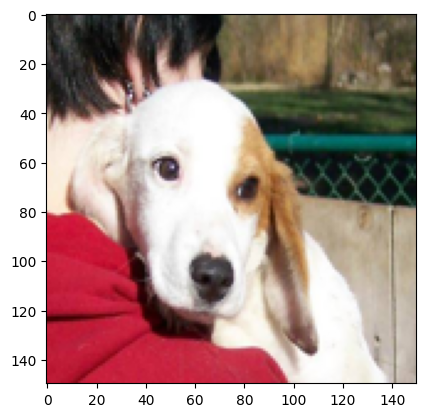

In [38]:
im_path = './data/cats_and_dogs_filtered/validation/dogs/dog.2008.jpg'
img = im_preprocess(img_path=im_path, display=True)

In [39]:
pred_b4_training = model.predict(img)
print(pred_b4_training)
print('\n Prediction before Training:', class_names[np.argmax(pred_b4_training)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
[[0.52609503 0.473905  ]]

 Prediction before Training: cats


In [40]:
sum(np.array(pred_b4_training[0]))  # Softmax activation layer sums up to 1.

1.0000000298023224

In [41]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

In [43]:
# Defines the loss function, the optimizer and the metrics
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
             loss = 'categorical_crossentropy', metrics=[keras.metrics.CategoricalAccuracy()])

In [45]:
hist = model.fit(train_generator, epochs = 100, validation_data = validation_generator, callbacks=[tensorboard_callback])

Epoch 1/100


/home/pankaja/anaconda3/envs/tf-dev/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1719754567.280191  150728 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1039', 4 bytes spill stores, 4 bytes spill loads



32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 370ms/step - categorical_accuracy: 0.5019 - loss: 0.7134 - val_categorical_accuracy: 0.5020 - val_loss: 0.6767
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - categorical_accuracy: 0.5556 - loss: 0.6774 - val_categorical_accuracy: 0.6400 - val_loss: 0.6414
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - categorical_accuracy: 0.6134 - loss: 0.6606 - val_categorical_accuracy: 0.6580 - val_loss: 0.6229
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - categorical_accuracy: 0.6347 - loss: 0.6319 - val_categorical_accuracy: 0.6480 - val_loss: 0.6107
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - categorical_accuracy: 0.6665 - loss: 0.6174 - val_categorical_accuracy: 0.6900 - val_loss: 0.5897
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - categorical_accuracy: 0.6376 - loss: 0.6249 - val_categorical_accuracy: 0.6720 - val_loss: 0.5839
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - categorical_accuracy: 0.6861 - loss: 0

### Save & Load Trained Model

In [46]:
model.save("cats_and_dogs.h5")

In [47]:
trained_model = keras.models.load_model('cats_and_dogs.h5')

## Prediction after training

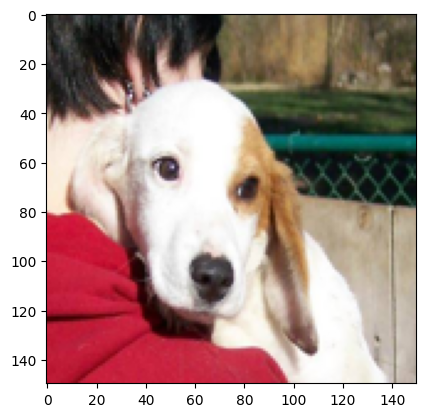

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
[[0.12457168 0.8754283 ]]

 Prediction after Training: dogs


In [48]:
im_path = './data/cats_and_dogs_filtered/validation/dogs/dog.2008.jpg'
img = im_preprocess(img_path=im_path, display=True)
pred_b4_training = trained_model.predict(img)
print(pred_b4_training)
print('\n Prediction after Training:', class_names[np.argmax(pred_b4_training)])

# Evaluate Model

In [49]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(validation_generator, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - categorical_accuracy: 0.7685 - loss: 0.4665
test loss, test acc: [0.4624463617801666, 0.7770000100135803]


In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
%tensorboard --logdir './logs'